In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/parkinsons-disease-data-set/parkinsons.data


# Problem
This project aims to develop a machine learning model with the capability to make accurate predictions regarding the presence of Parkinson's disease in individuals based on the analysis of their **voice recordings**. Parkinson's disease is a progressive neurodegenerative disorder primarily recognized for its impact on motor functions, giving rise to symptoms such as tremors, muscular rigidity, and difficulties in maintaining coordinated movements. By utilizing advanced computational techniques, this project seeks to establish a reliable tool for early detection and potential monitoring of Parkinson's disease through non-invasive voice analysis.


# Steps

* **Explore the Dataset**: 

     Reveal the underlying trends, occurrences, and connections present in the data by identifying patterns, distributions, and relationships..
        
* **Preprocessing Steps**:

    Remove irrelevant features
    
    Address missing values
    
    Treat outliers
    
    Encode categorical variables
    
* **Conduct Extensive Exploratory Data Analysis (EDA)**:

     Dive deep into bivariate relationships against the target.
    
* **Model Building**:

    Establish pipelines for models that require scaling
    
    Implement classification models including KNN, SVM, Decision Trees, and Random Forest
    
    Neural network architecture
    
* **Evaluate and Compare Model Performance**: 

    Utilize precision, recall, and F1-score to gauge models' effectiveness.

# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report,confusion_matrix

from pprint import pprint  
from sklearn.model_selection import GridSearchCV


 # **1. Dataset Exploration**

In [4]:
df=pd.read_csv("/kaggle/input/parkinsons-disease-data-set/parkinsons.data")
print(df.shape)
df.head()

(195, 24)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
df.status

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


# **2. Preprocessing**

**2.1 Missing Values**

In [8]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

**2.2 Duplicates**

In [9]:
df.duplicated().sum()

0

**2.3 Finding outliers and skewness**

* **Skewness** refers to the measure of asymmetry in the distribution of data. It indicates whether the data is symmetrically distributed around the mean or if it's skewed towards one end of the distribution. (normally distributed if skewness=0)

* **Outliers** are data points that significantly differ from the rest of the observations in a dataset. They can arise due to various reasons such as measurement errors, experimental errors, or genuinely rare events. Outliers can distort statistical analyses and machine learning models if not handled properly.


In [10]:
df_copy=df
X=df_copy.drop(['name','status'],axis=1)
y=df_copy["status"]

In [11]:
X.skew().sort_values(ascending=False)

NHR                 4.220709
Jitter:DDP          3.362058
MDVP:RAP            3.360708
MDVP:Jitter(%)      3.084946
MDVP:PPQ            3.073892
MDVP:Jitter(Abs)    2.649071
MDVP:APQ            2.618047
MDVP:Fhi(Hz)        2.542146
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ5        1.798697
MDVP:Shimmer        1.666480
Shimmer:DDA         1.580618
Shimmer:APQ3        1.580576
MDVP:Flo(Hz)        1.217350
PPE                 0.797491
MDVP:Fo(Hz)         0.591737
spread1             0.432139
D2                  0.430384
spread2             0.144430
DFA                -0.033214
RPDE               -0.143402
HNR                -0.514317
dtype: float64

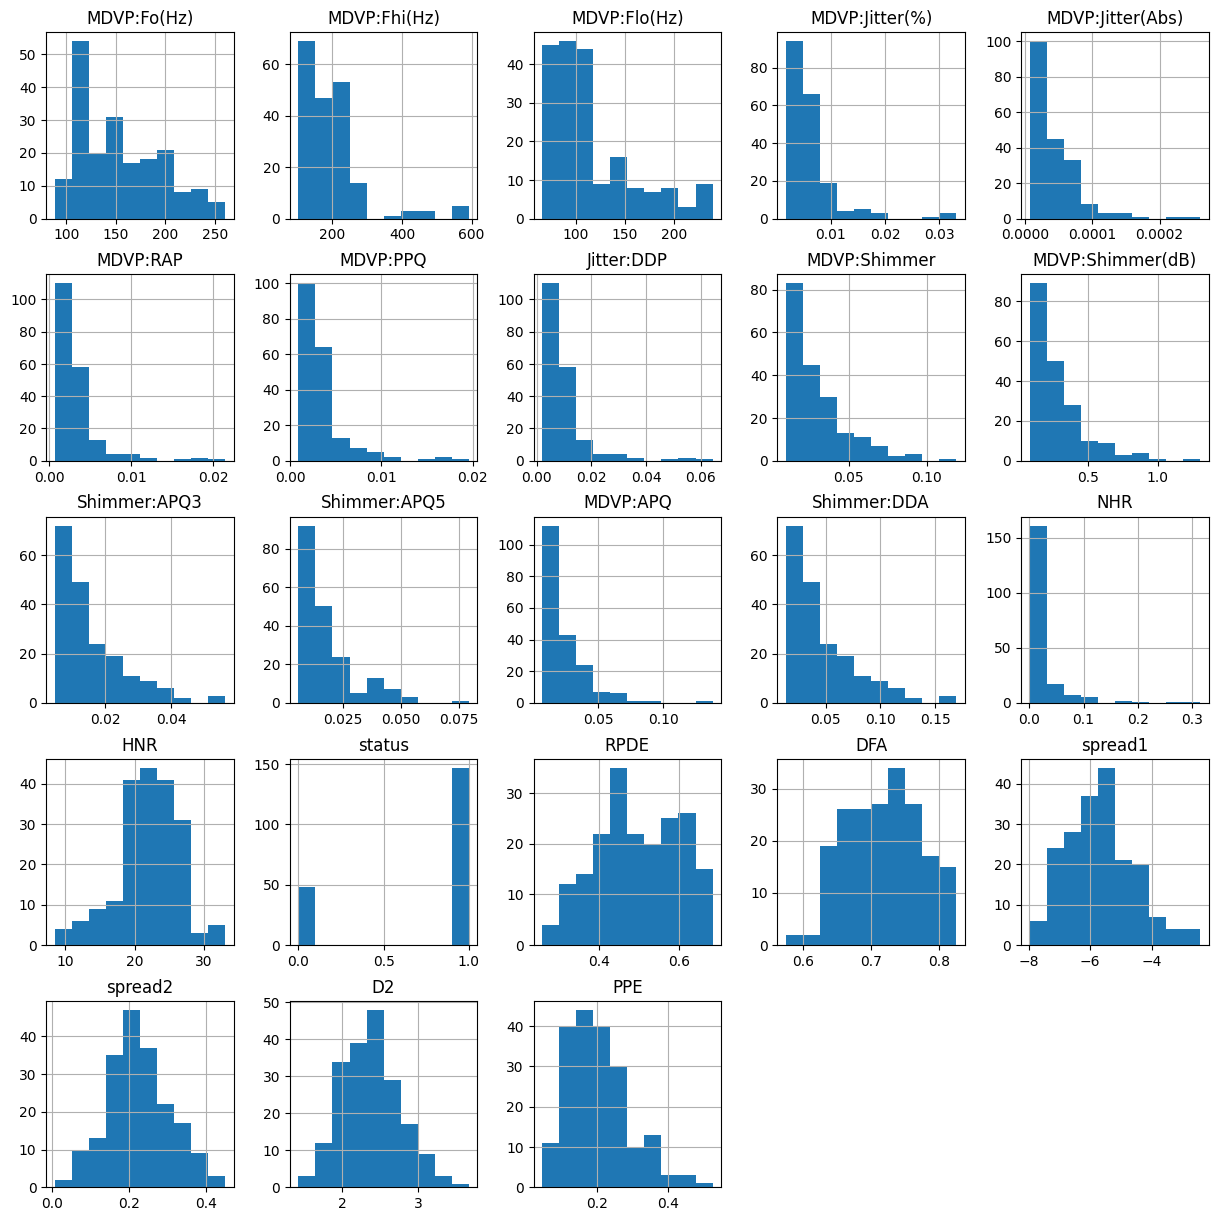

In [12]:
df.hist(figsize=(15,15));

**We can see some of the data is normally distributed and most of the attributes are right skewed**

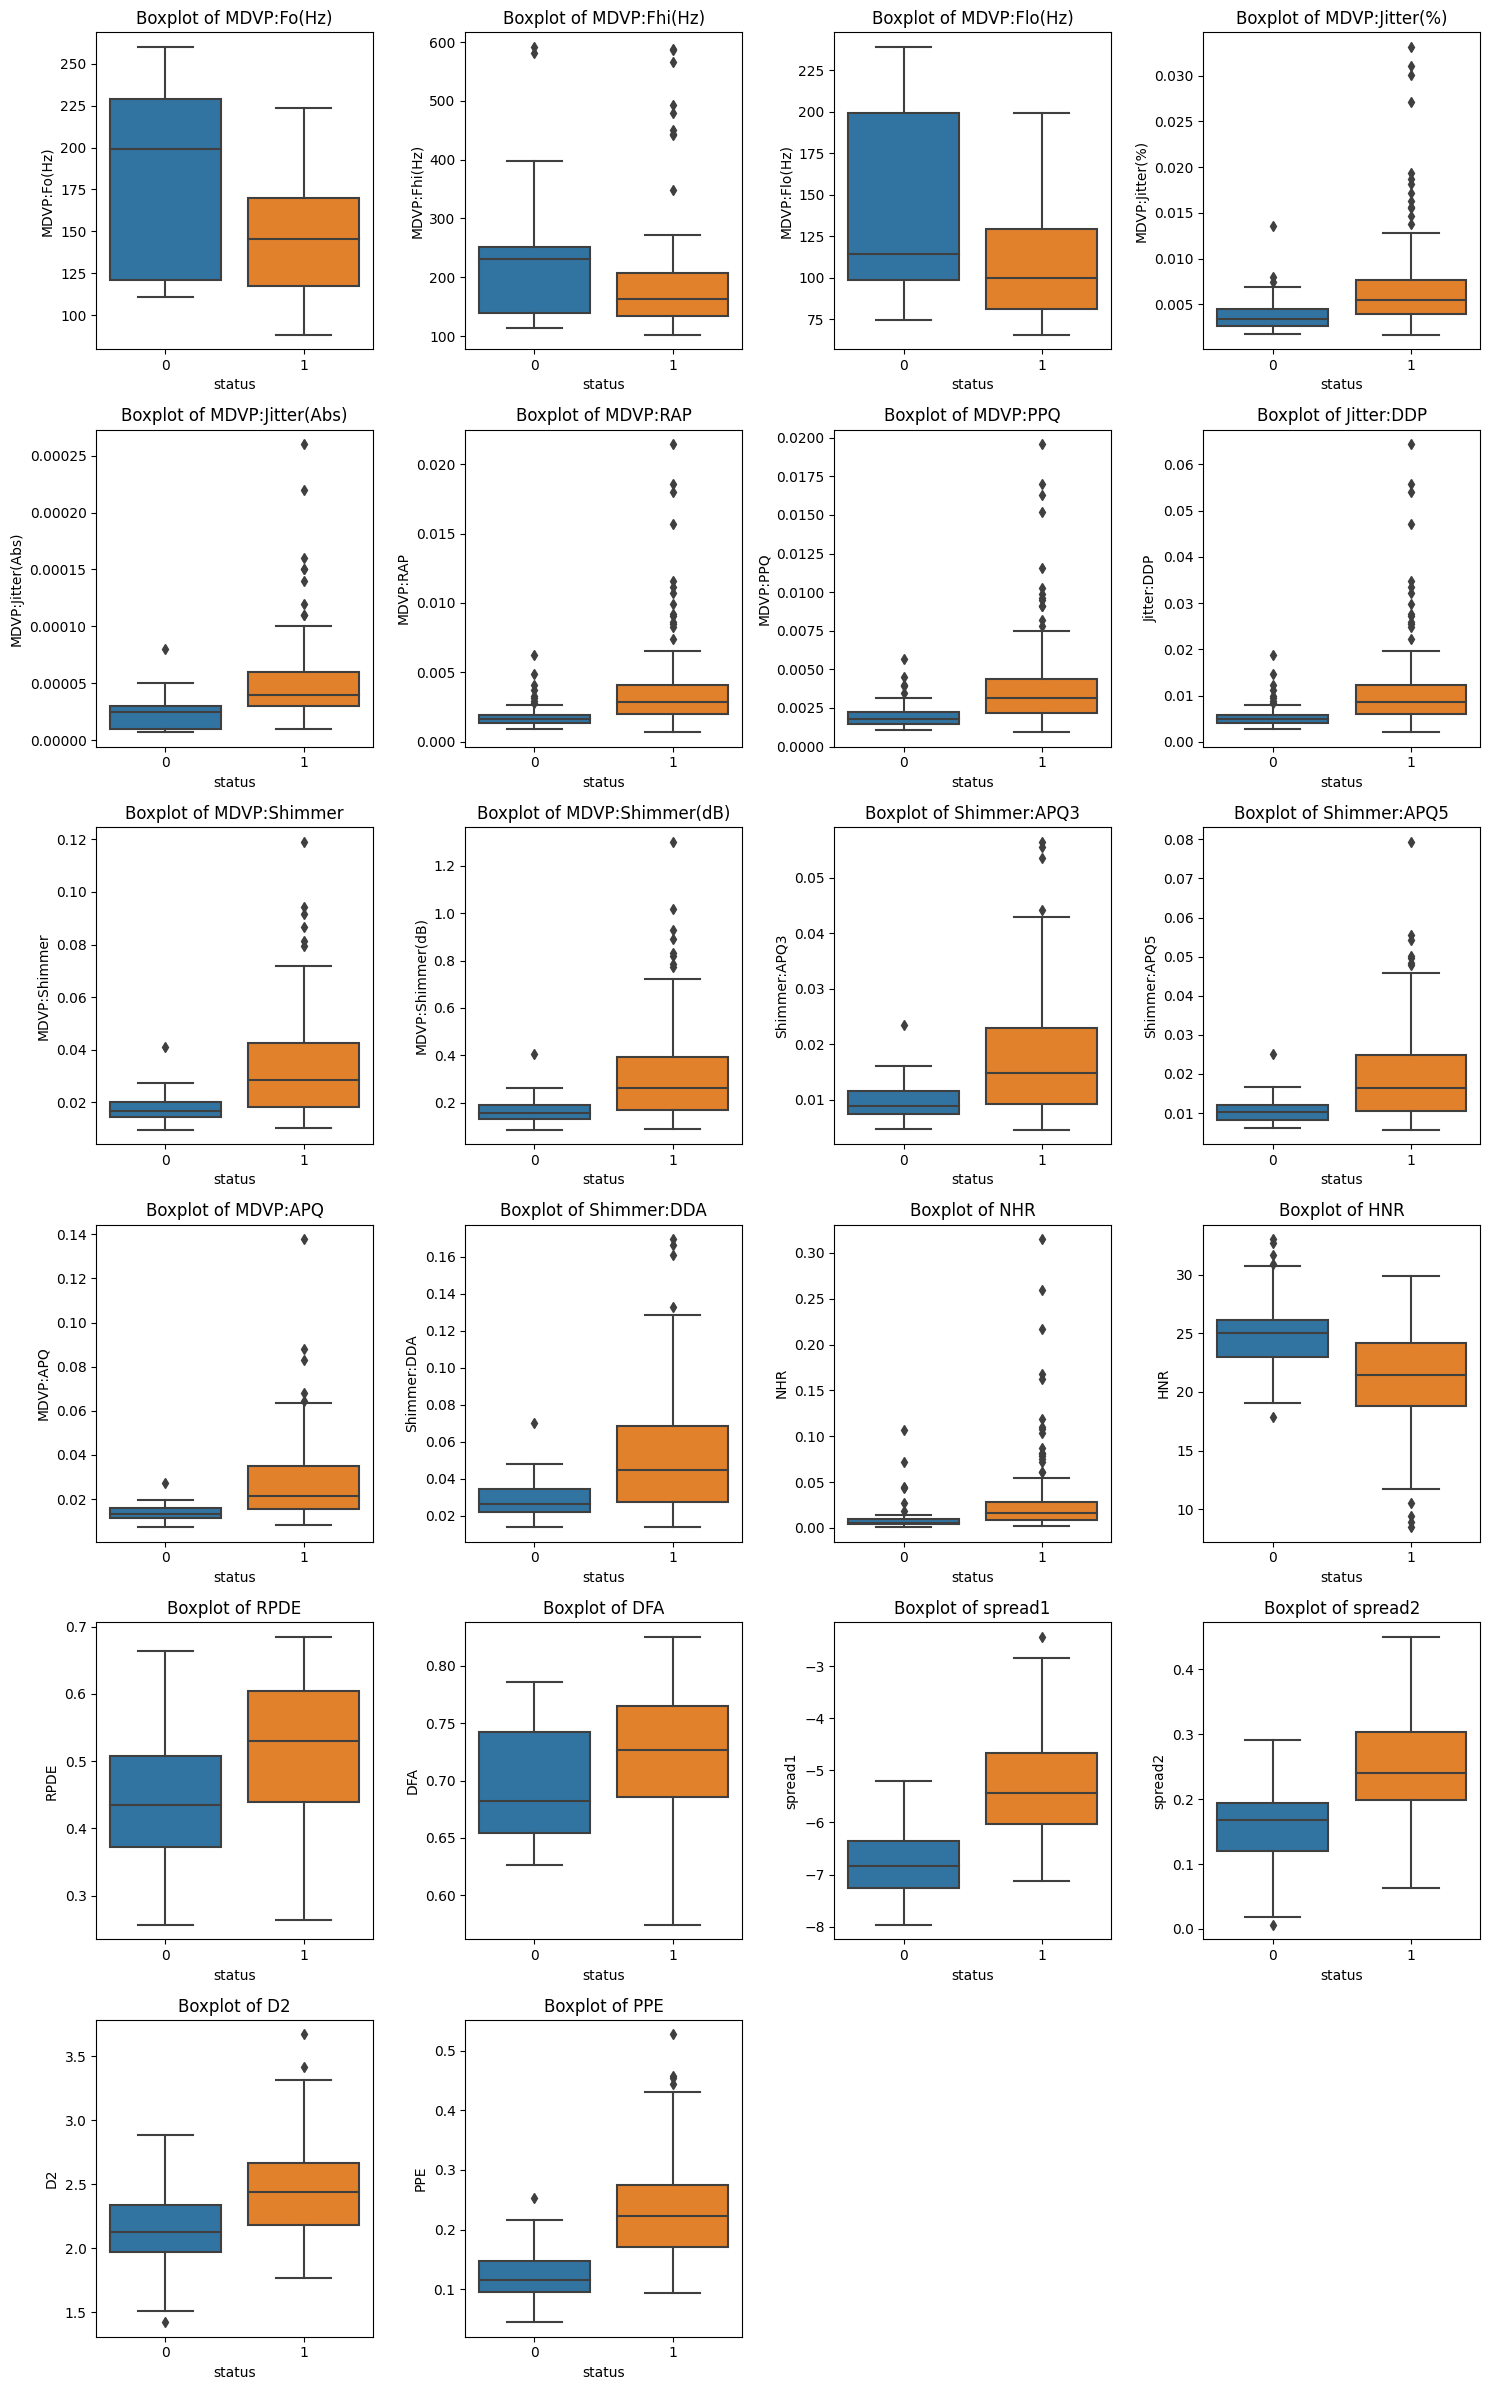

In [13]:
features= X.columns

num_features = len(features)
num_cols = 4 
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows))

for i, feature in enumerate(features):
    row_index = i // num_cols  # Calculate the row index for subplot
    col_index = i % num_cols   # Calculate the column index for subplot
    sns.boxplot(x=df['status'], y=df[feature], ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Boxplot of {feature}')

# Hide empty subplots if necessary
for i in range(num_features, num_rows*num_cols):
    row_index = i // num_cols
    col_index = i % num_cols
    fig.delaxes(axes[row_index, col_index])

plt.tight_layout()
plt.show()


# NOTE: Tree-based algorithms, such as decision trees, random forests, and gradient boosting machines, are generally robust to skewness in the input features.

**2.4 Target value**

<Axes: ylabel='count'>

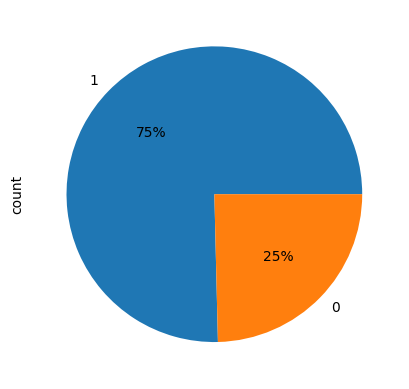

In [14]:
df['status'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

**-> Target values is unbalanced**

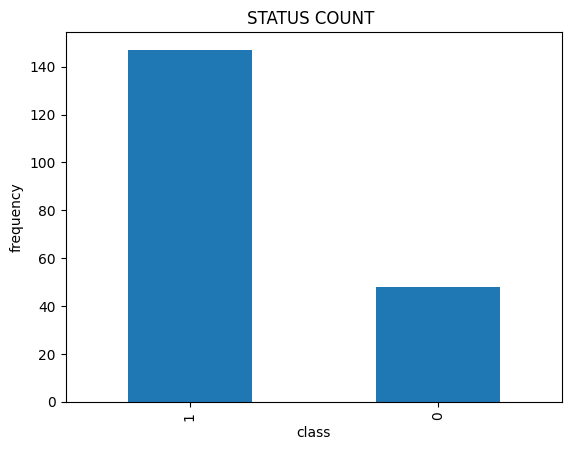

<Figure size 640x100 with 0 Axes>

In [15]:
count=df['status'].value_counts()
count.plot(kind = "bar")
plt.title("STATUS COUNT ")
plt.xlabel("class")
plt.ylabel("frequency")
plt.figure().set_figheight(1)
plt.show()

In [16]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [17]:
from imblearn.over_sampling import RandomOverSampler
Sample = RandomOverSampler(sampling_strategy = 0.6)
X_sam,Y_sam=Sample.fit_resample(X,y)

/tmp/ipykernel_34/2023006927.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count = pd.value_counts(Y_sam,  sort = True)


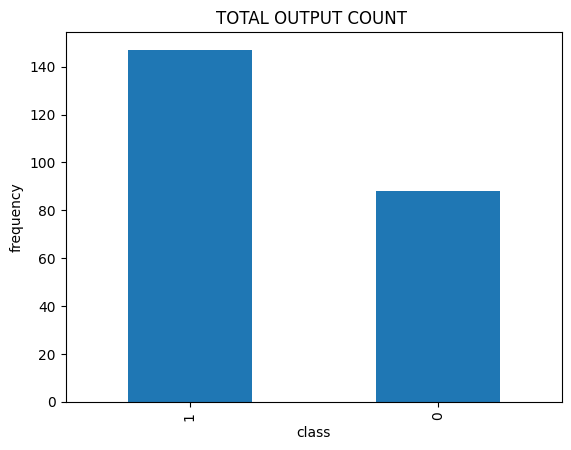

<Figure size 640x100 with 0 Axes>

In [18]:
count = pd.value_counts(Y_sam,  sort = True)

count.plot(kind = "bar")
plt.title("TOTAL OUTPUT COUNT ")
plt.xlabel("class")
plt.ylabel("frequency")
plt.figure().set_figheight(1)
plt.show()

**2.5 Heatmap**

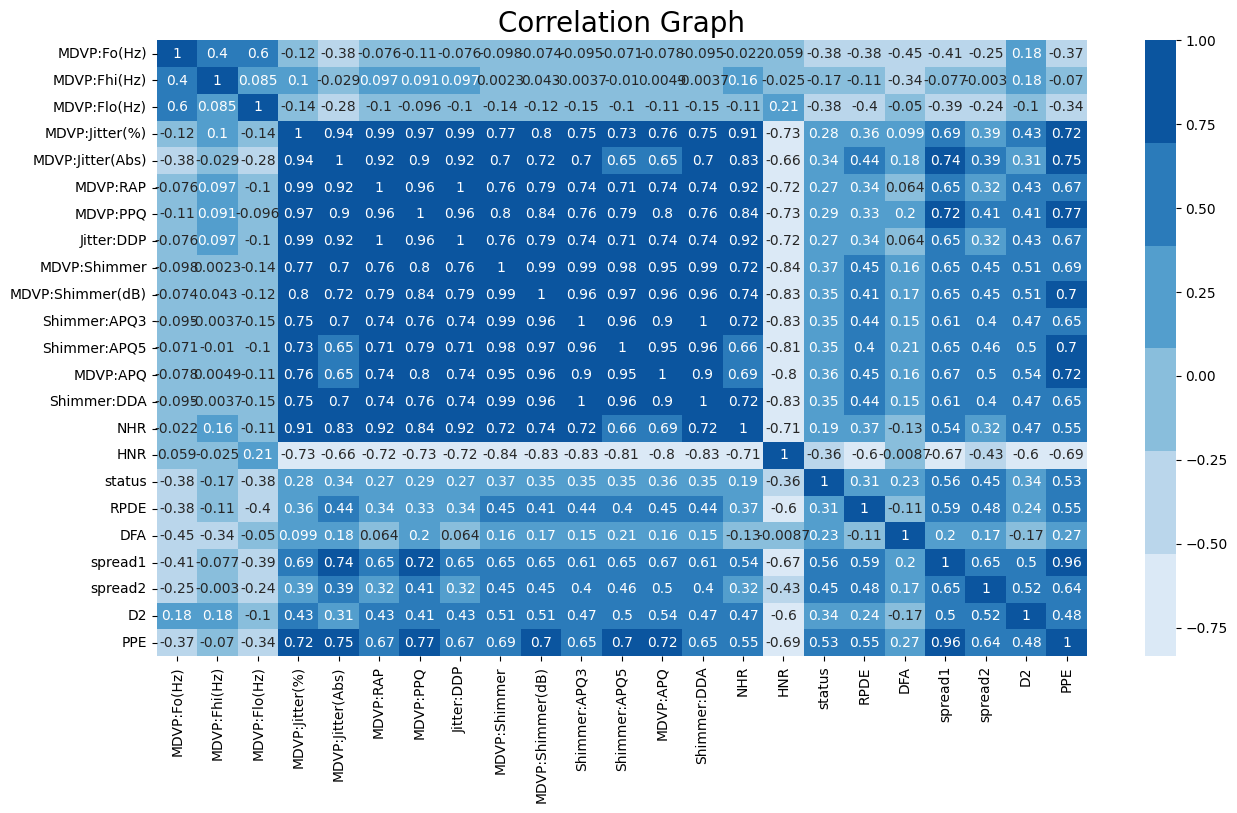

In [19]:
plt.figure(figsize=[15, 8], dpi=100)
plt.title("Correlation Graph", fontsize=20)

numerical=df.drop('name', axis=1)

cmap = sns.color_palette("Blues")

sns.heatmap(numerical.corr(), annot=True, cmap=cmap)

plt.show()


# **3. Spilitting The Data & Scaling**

In [20]:
X_train , X_test, y_train , y_test = train_test_split(X_sam,Y_sam,test_size=0.2,random_state=42)

**MinMaxScaler**  (because data is not normally distributed)

In [21]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **4. Modeling & Evaluation**

**Evaluation Metrics:** 

 • Training Accuracy Score 
 
 • Cross Validation Score
 
 ❖ Testing Accuracy Score
 
 • Precision Score
 
 • Recall Score
 
 • F1-Score Score

# Training Models + Evaluation in **Training Set**

In [22]:
# Define models to test
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

#  Metrics
training_accuracy = {}
cross_validation_score_train = {}
precision_train = {}
recall_train = {}
f1_train = {}

# Train, test, and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Training Accuracy Score
    training_accuracy[name] = model.score(X_train_scaled, y_train)
        
    # Cross Validation Score
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    cross_validation_score_train[name] = cv_scores.mean()
    
    
    # Precision Score
    y_pred = model.predict(X_train_scaled)
    precision_train[name] = precision_score(y_train, y_pred)
    
    # Recall Score
    recall_train[name] = recall_score(y_train, y_pred)
    
    # F1-Score Score
    f1_train[name] = f1_score(y_train, y_pred)

# Print evaluation metrics for each model
print("*"*50)
print("Training Set")
print("*"*50)
print("")

for name in models.keys():
    print(f"Model: {name}")
    print(f"Training Accuracy Score: {training_accuracy[name]}")
    print(f"Cross Validation Score: {cross_validation_score_train[name]}")
    print(f"Precision Score: {precision_train[name]}")
    print(f"Recall Score: {recall_train[name]}")
    print(f"F1-Score Score: {f1_train[name]}")
    print("-" * 50)


**************************************************
Training Set
**************************************************

Model: Logistic Regression
Training Accuracy Score: 0.7606382978723404
Cross Validation Score: 0.7662873399715505
Precision Score: 0.7686567164179104
Recall Score: 0.8803418803418803
F1-Score Score: 0.8207171314741036
--------------------------------------------------
Model: SVM
Training Accuracy Score: 0.8776595744680851
Cross Validation Score: 0.8031294452347083
Precision Score: 0.8507462686567164
Recall Score: 0.9743589743589743
F1-Score Score: 0.9083665338645418
--------------------------------------------------
Model: Decision Trees
Training Accuracy Score: 1.0
Cross Validation Score: 0.8883357041251779
Precision Score: 1.0
Recall Score: 1.0
F1-Score Score: 1.0
--------------------------------------------------
Model: Random Forest
Training Accuracy Score: 1.0
Cross Validation Score: 0.9256045519203415
Precision Score: 1.0
Recall Score: 1.0
F1-Score Score: 1.0
------

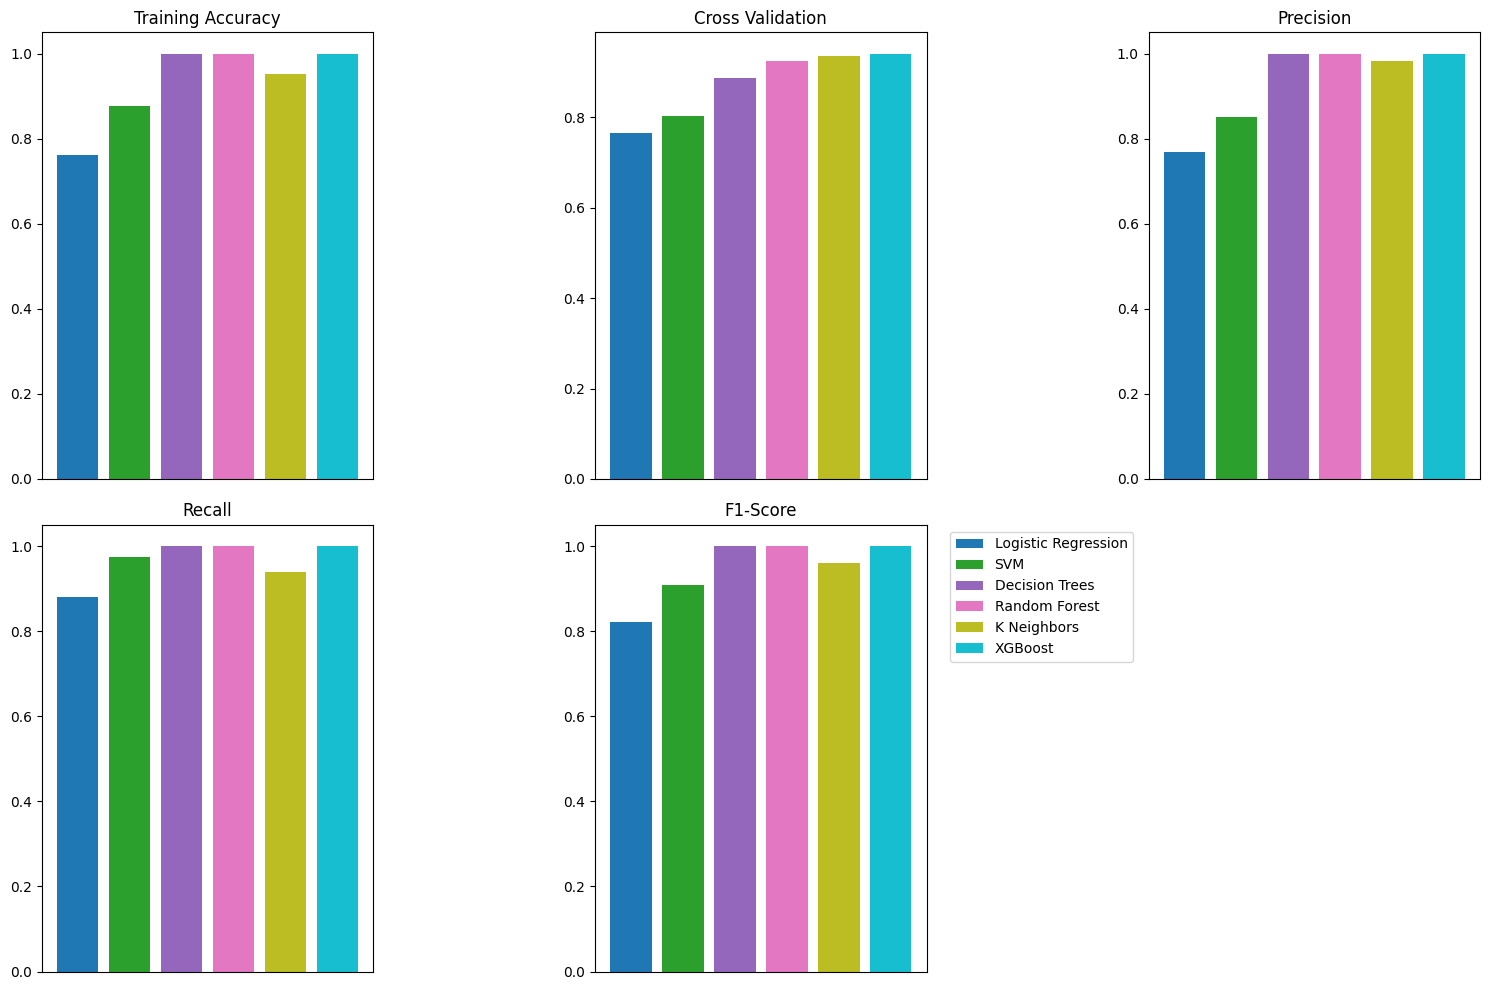

In [23]:
metric_names = ["Training Accuracy", "Cross Validation", "Precision", "Recall", "F1-Score"]
scores = [training_accuracy, cross_validation_score_train, precision_train, recall_train, f1_train]

# Define colors for each model
colors = plt.cm.tab10(np.linspace(0, 1, len(models)))  # Generate colors from the 'tab10' colormap

# Plotting
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metric_names):
    plt.subplot(2, 3, i+1)
    for j, model_name in enumerate(models.keys()):
        plt.bar(model_name, scores[i][model_name], color=colors[j], label=model_name)
    plt.title(metric)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


---> Random Forest - XGboost - K Neighbors (less overfitting risk)

In [24]:
# Define models to test
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

#  Metrics
testing_accuracy = {}
cross_validation_score_test = {}
precision_test = {}
recall_test = {}
f1_test = {}

# Train, test, and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_test_scaled, y_test)
    
    # Testing Accuracy Score
    testing_accuracy[name] = model.score(X_test_scaled, y_test)
    
    # Cross Validation Score
    cv_scores_test = cross_val_score(model, X_test_scaled, y_test, cv=5)
    cross_validation_score_test[name] = cv_scores_test.mean()
    
    
    # Precision Score
    y_pred = model.predict(X_test_scaled)
    precision_test[name] = precision_score(y_test, y_pred)
    
    # Recall Score
    recall_test[name] = recall_score(y_test, y_pred)
    
    # F1-Score Score
    f1_test[name] = f1_score(y_test, y_pred)

# Print evaluation metrics for each model
print("*"*50)
print("Testing Set")
print("*"*50)
print("")
# Print evaluation metrics for each model
for name in models.keys():
    print(f"Model: {name}")
    print(f"Testing Accuracy Score: {testing_accuracy[name]}")
    print(f"Cross Validation Score: {cross_validation_score_test[name]}")
    print(f"Precision Score: {precision_test[name]}")
    print(f"Recall Score: {recall_test[name]}")
    print(f"F1-Score Score: {f1_test[name]}")
    print("-" * 50)


**************************************************
Testing Set
**************************************************

Model: Logistic Regression
Testing Accuracy Score: 0.8297872340425532
Cross Validation Score: 0.8288888888888888
Precision Score: 0.8055555555555556
Recall Score: 0.9666666666666667
F1-Score Score: 0.8787878787878789
--------------------------------------------------
Model: SVM
Testing Accuracy Score: 0.9148936170212766
Cross Validation Score: 0.8288888888888888
Precision Score: 0.8823529411764706
Recall Score: 1.0
F1-Score Score: 0.9375
--------------------------------------------------
Model: Decision Trees
Testing Accuracy Score: 1.0
Cross Validation Score: 0.7844444444444445
Precision Score: 1.0
Recall Score: 1.0
F1-Score Score: 1.0
--------------------------------------------------
Model: Random Forest
Testing Accuracy Score: 1.0
Cross Validation Score: 0.8688888888888888
Precision Score: 1.0
Recall Score: 1.0
F1-Score Score: 1.0
--------------------------------------

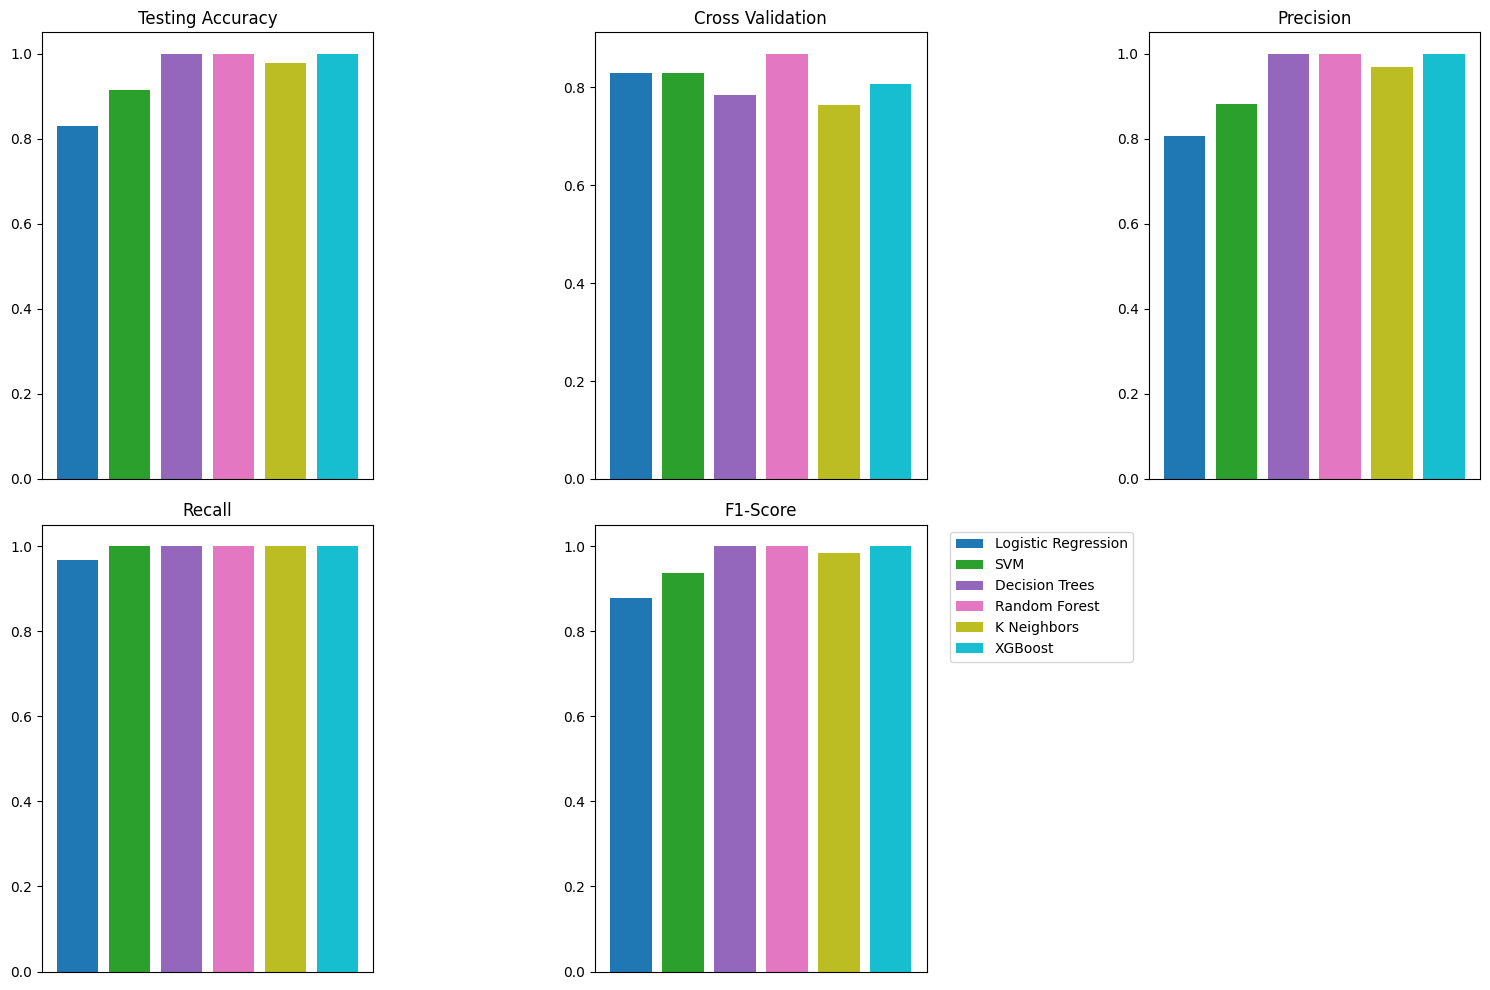

In [25]:
metric_names = ["Testing Accuracy", "Cross Validation", "Precision", "Recall", "F1-Score"]
scores = [testing_accuracy, cross_validation_score_test, precision_test, recall_test, f1_test]

# Define colors for each model
colors = plt.cm.tab10(np.linspace(0, 1, len(models)))  # Generate colors from the 'tab10' colormap

# Plotting
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metric_names):
    plt.subplot(2, 3, i+1)
    for j, model_name in enumerate(models.keys()):
        plt.bar(model_name, scores[i][model_name], color=colors[j], label=model_name)
    plt.title(metric)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


--> Random Forest - XGboost - K Neighbors

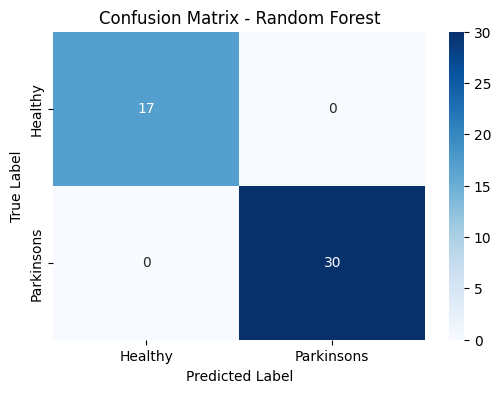

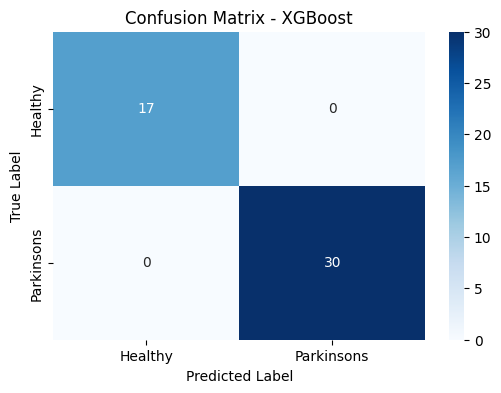

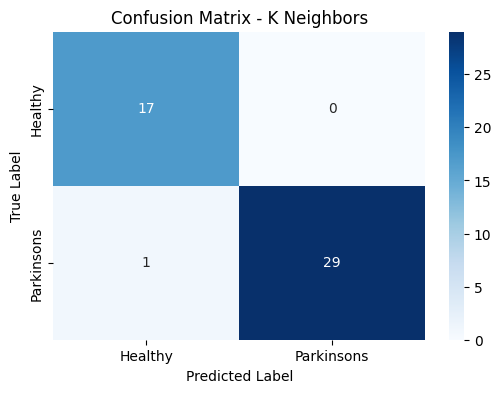

In [26]:
chosen_models = {
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "K Neighbors": KNeighborsClassifier()
}

# Define function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Iterate over each model and plot confusion matrix
for name, model in chosen_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    plot_confusion_matrix(y_test, y_pred, name)


# Hyperparameters Tuning 

NOTE: 
Achieving a training accuracy of 1.0 as before can indicate that the model has perfectly learned the training data, but it doesn't necessarily mean the model will generalize well to unseen data. Similarly, having a testing accuracy of 1.0 can indicate that the model performs perfectly on the testing data, but it's essential to consider whether this level of performance is realistic and whether the model has truly learned meaningful patterns from the data 

==> overfitting because our data is unbalanced

==> in our case hyperparams tuning is to reduce overfitting

**Random Forest**

Evaluation Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
cross_validation_score: 0.8111111111111111

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        30

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47



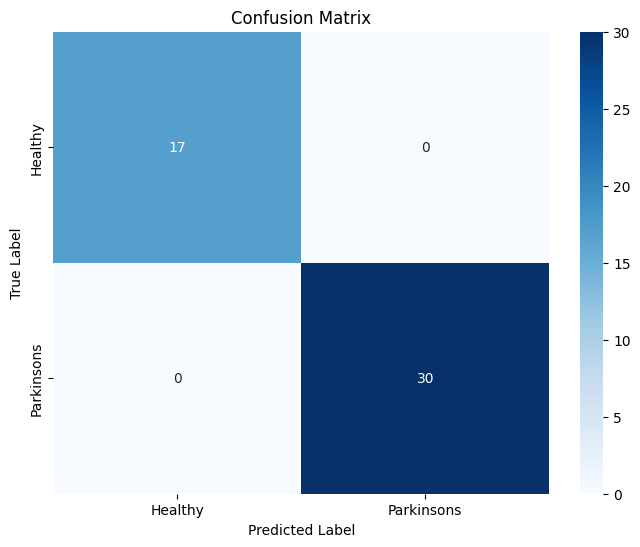

In [27]:

rf_classifier = RandomForestClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator with the tuned hyperparameters
best_rf_classifier = grid_search.best_estimator_

# Make predictions on the testing set
y_pred = best_rf_classifier.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

cv_scores_test = cross_val_score(best_rf_classifier, X_test_scaled, y_test, cv=5)
cross_validation_score = cv_scores_test.mean()


# Print the evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("cross_validation_score:", cross_validation_score)


# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


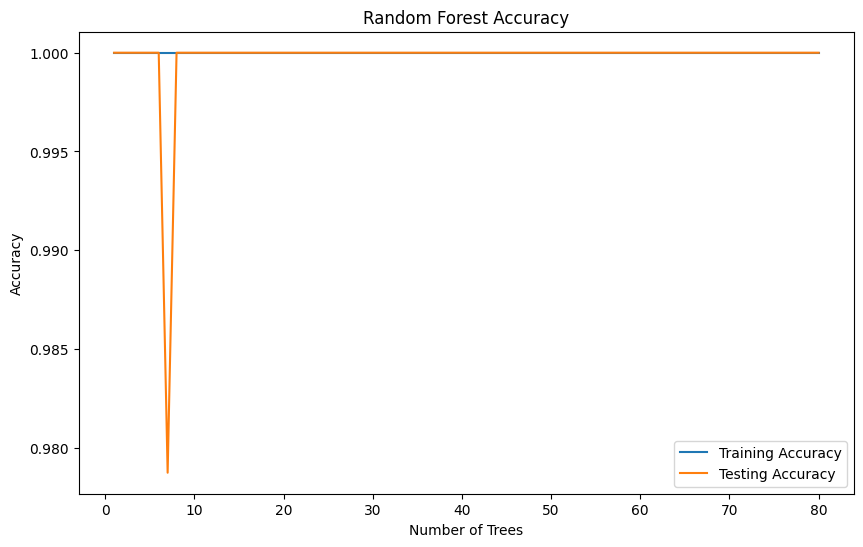

In [28]:
train_accuracy = []
test_accuracy = []

for i in range(1, 81):
    best_rf_classifier.fit(X_train_scaled, y_train)
    train_accuracy.append(best_rf_classifier.score(X_train_scaled, y_train))
    test_accuracy.append(best_rf_classifier.score(X_test_scaled, y_test))

# Plot the accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, 81), train_accuracy, label='Training Accuracy')
plt.plot(range(1, 81), test_accuracy, label='Testing Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy')
plt.legend()
plt.show()


**XGboost**

Evaluation Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
cross_validation_score: 0.828888888888889

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        30

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47



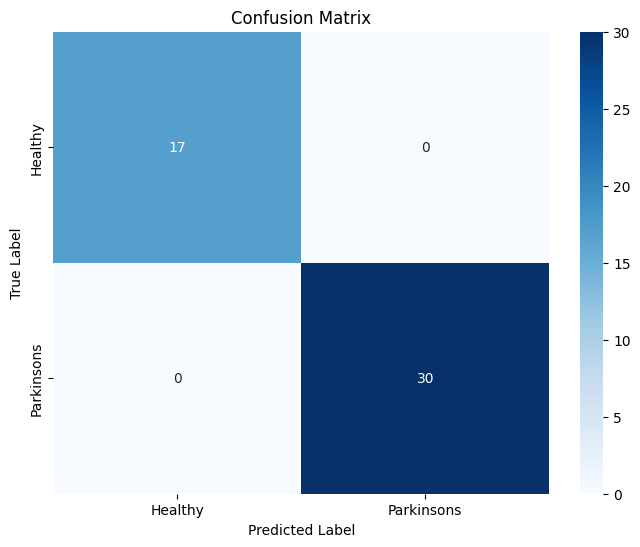

In [29]:

# Define the XGBoost classifier
xgb_classifier = XGBClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'gamma': [0, 0.1, 0.2]
}

# Perform Grid Search to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator with the tuned hyperparameters
best_xgb_classifier = grid_search.best_estimator_

# Make predictions on the testing set
y_pred = best_xgb_classifier.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cv_scores_test = cross_val_score(best_xgb_classifier, X_test_scaled, y_test, cv=5)
cross_validation_score = cv_scores_test.mean()


# Print the evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("cross_validation_score:", cross_validation_score)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


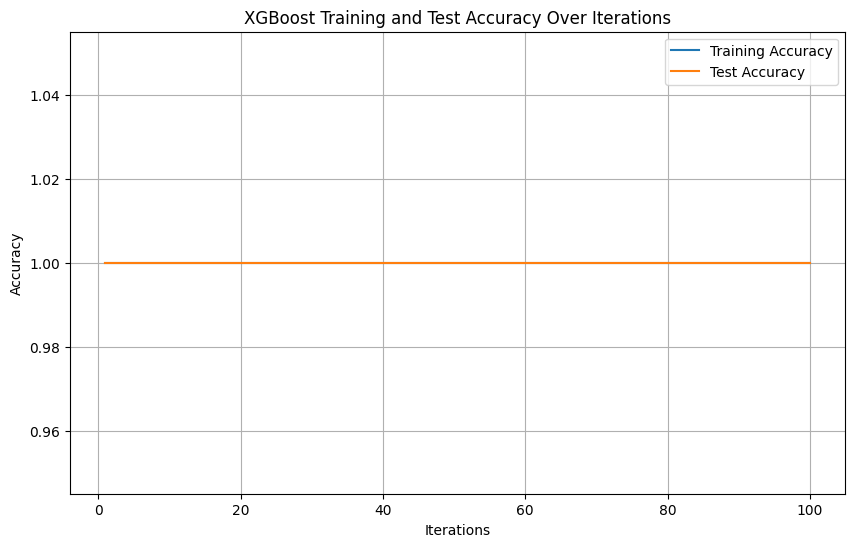

In [30]:
n_iterations = 100

train_accuracy = []
test_accuracy = []


# Train the model for each iteration and record accuracies
for i in range(1, n_iterations+1):
    best_xgb_classifier.fit(X_train_scaled, y_train)
    train_accuracy.append(best_xgb_classifier.score(X_train_scaled, y_train))
    test_accuracy.append(best_xgb_classifier.score(X_test_scaled, y_test))


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_iterations+1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, n_iterations+1), test_accuracy, label='Test Accuracy')
plt.title('XGBoost Training and Test Accuracy Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


**K Neighbors**

Evaluation Metrics:
Accuracy: 0.9787234042553191
Precision: 0.9799054373522459
Recall: 0.9787234042553191
F1-Score: 0.9788470454896707
cross_validation_score: 0.8088888888888889

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.97      0.98        30

    accuracy                           0.98        47
   macro avg       0.97      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47



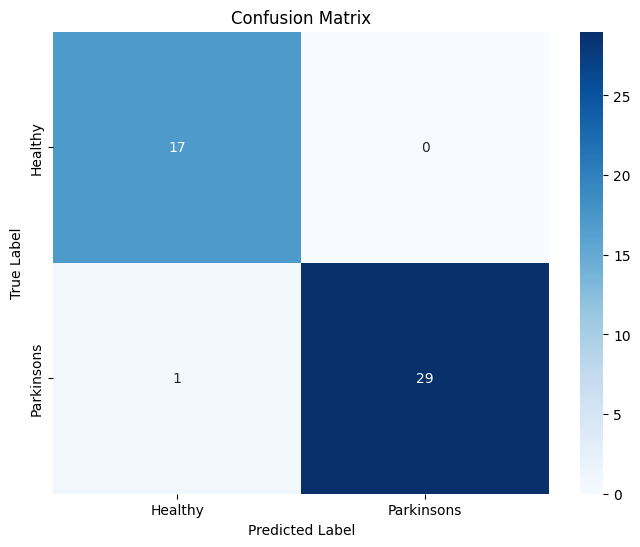

In [31]:
knn_classifier = KNeighborsClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski distance metric
}

# Perform Grid Search to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator with the tuned hyperparameters
best_knn_classifier = grid_search.best_estimator_

# Make predictions on the testing set
y_pred = best_knn_classifier.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

cv_scores_test = cross_val_score(best_knn_classifier, X_test_scaled, y_test, cv=5)
cross_validation_score = cv_scores_test.mean()


# Print the evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("cross_validation_score:", cross_validation_score)


# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



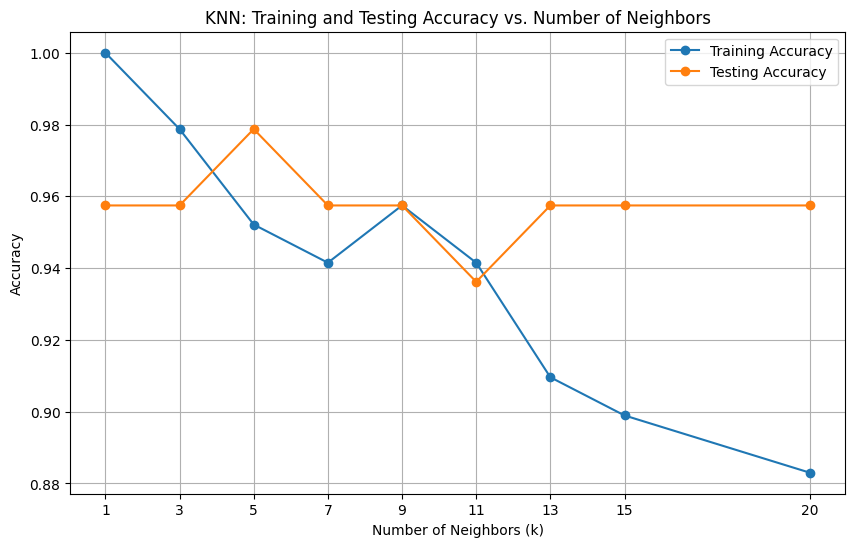

In [32]:

# Define the range of k values for neighbors
neighbors_range = [1,3, 5, 7, 9, 11, 13, 15,20]  # Example range, adjust as needed

# Initialize lists to store training and testing accuracy
train_accuracy = []
test_accuracy = []

# Iterate over different values of k
for k in neighbors_range:
    # Create K Neighbors Classifier with current k value
    best_knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the classifier on the training data
    best_knn_classifier.fit(X_train_scaled, y_train)
    
    # Calculate training accuracy and append to list
    train_accuracy.append(best_knn_classifier.score(X_train_scaled, y_train))
    
    # Calculate testing accuracy and append to list
    test_accuracy.append(best_knn_classifier.score(X_test_scaled, y_test))

# Plot the training and testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(neighbors_range, test_accuracy, label='Testing Accuracy', marker='o')
plt.title('KNN: Training and Testing Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(neighbors_range)
plt.legend()
plt.grid(True)
plt.show()


# **Conclusion**

Models demonstrate high accuracy and F1-scores, indicating strong performance. However, there are some differences to consider:

* Random Forest & XGboost achieves higher metrics (BUT we might have risks of overfitting)

* K Neighbors achieves good metric less than the other two yet less risk of overfitting

Given the performance of both models, either could be a suitable choice.


In [33]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[0]
The Person does not have Parkinsons Disease


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
